In [1]:
import json
import pandas as pd
import glob


In [2]:
# Load all spotify JSON files
files = glob.glob("../data/raw/*.json")

data = []
for file in files:
    with open(file, "r", encoding="utf-8") as f:
        data.extend(json.load(f))

df = pd.DataFrame(data)
df.head()


,ts,platform,ms_played,conn_country,ip_addr,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,...,audiobook_uri,audiobook_chapter_uri,audiobook_chapter_title,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,incognito_mode
0,2021-04-06T14:15:57Z,"Android OS 11 API 30 (samsung, SM-M215F)",8820,IN,49.206.35.80,00:00 (Zero O’Clock),BTS,MAP OF THE SOUL : 7,spotify:track:4AlihYDqxXshKhvh5tnMfP,None,...,None,None,None,clickrow,endplay,False,False,False,NaN,False
1,2021-04-06T14:17:44Z,"Android OS 11 API 30 (samsung, SM-M215F)",107594,IN,49.206.35.80,Interlude : Shadow,BTS,MAP OF THE SOUL : 7,spotify:track:2Nib4r0saYQf2pUV4RFDhl,None,...,None,None,None,clickrow,endplay,False,False,False,NaN,False
2,2021-04-06T14:17:51Z,"Android OS 11 API 30 (samsung, SM-M215F)",6237,IN,49.206.35.80,One Day At A Time,ATEEZ,ZERO : FEVER Part.1,spotify:track:1eFk8R4OobU7kaAZdfYBKz,None,...,None,None,None,clickrow,endplay,False,False,False,NaN,False
3,2021-04-06T14:18:09Z,"Android OS 11 API 30 (samsung, SM-M215F)",18266,IN,49.206.35.80,Precious (Overture),ATEEZ,TREASURE EP.FIN : All To Action,spotify:track:6gbhjkoubkuIzKSEV37suF,None,...,None,None,None,clickrow,endplay,False,False,False,NaN,False
4,2021-04-06T14:21:27Z,"Android OS 11 API 30 (samsung, SM-M215F)",197390,IN,49.206.35.80,ILLUSION,ATEEZ,TREASURE EP.3 : One To All,spotify:track:4hQHA562yLkVKlakkOkz5l,None,...,None,None,None,clickrow,endplay,False,False,False,NaN,False


In [3]:
df['ts'] = pd.to_datetime(df['ts'], utc=True)


In [4]:
df['date'] = df['ts'].dt.date
df['hour'] = df['ts'].dt.hour
df['day_name'] = df['ts'].dt.day_name()
df['month'] = df['ts'].dt.to_period('M').astype(str)


C:\Users\Swathi\AppData\Local\Temp\ipykernel_15232\2033858719.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['ts'].dt.to_period('M').astype(str)


In [5]:
df = df.rename(columns={
    'master_metadata_track_name': 'track_name',
    'master_metadata_album_artist_name': 'artist_name',
    'master_metadata_album_album_name': 'album_name',
    'ms_played': 'ms_played'
})


In [6]:
df['content_type'] = df.apply(
    lambda x: 'Podcast' if pd.notnull(x['episode_name']) else 'Song',
    axis=1
)


In [7]:
df = df[df['content_type'] == 'Song']


In [8]:
df = df[df['ms_played'] > 0]


In [9]:
df['play_minutes'] = df['ms_played'] / 60000


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 32543 entries, 0 to 33249
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   ts                       32543 non-null  datetime64[ns, UTC]
 1   platform                 32543 non-null  object             
 2   ms_played                32543 non-null  int64              
 3   conn_country             32543 non-null  object             
 4   ip_addr                  32543 non-null  object             
 5   track_name               32543 non-null  object             
 6   artist_name              32543 non-null  object             
 7   album_name               32543 non-null  object             
 8   spotify_track_uri        32543 non-null  object             
 9   episode_name             0 non-null      object             
 10  episode_show_name        0 non-null      object             
 11  spotify_episode_uri      0 non-nu

In [11]:
df.describe()


,ms_played,offline_timestamp,hour,play_minutes
count,3.254300e+04,2.181300e+04,32543.000000,32543.000000
mean,1.418798e+05,6.982924e+09,10.874412,2.364663
std,9.550524e+04,9.275376e+10,5.786529,1.591754
min,1.000000e+00,1.665649e+09,0.000000,0.000017
25%,3.699300e+04,1.692933e+09,5.000000,0.616550
50%,1.716180e+05,1.728498e+09,11.000000,2.860300
75%,2.139320e+05,1.744188e+09,16.000000,3.565533
max,1.582097e+06,1.665425e+12,23.000000,26.368283


In [12]:
df.to_csv("../data/processed/spotify_cleaned.csv", index=False)


In [13]:
import pandas as pd

df = pd.read_csv("../data/processed/spotify_cleaned.csv")
df.head()


,ts,platform,ms_played,conn_country,ip_addr,track_name,artist_name,album_name,spotify_track_uri,episode_name,...,skipped,offline,offline_timestamp,incognito_mode,date,hour,day_name,month,content_type,play_minutes
0,2021-04-06 14:15:57+00:00,"Android OS 11 API 30 (samsung, SM-M215F)",8820,IN,49.206.35.80,00:00 (Zero O’Clock),BTS,MAP OF THE SOUL : 7,spotify:track:4AlihYDqxXshKhvh5tnMfP,NaN,...,False,False,NaN,False,2021-04-06,14,Tuesday,2021-04,Song,0.147000
1,2021-04-06 14:17:44+00:00,"Android OS 11 API 30 (samsung, SM-M215F)",107594,IN,49.206.35.80,Interlude : Shadow,BTS,MAP OF THE SOUL : 7,spotify:track:2Nib4r0saYQf2pUV4RFDhl,NaN,...,False,False,NaN,False,2021-04-06,14,Tuesday,2021-04,Song,1.793233
2,2021-04-06 14:17:51+00:00,"Android OS 11 API 30 (samsung, SM-M215F)",6237,IN,49.206.35.80,One Day At A Time,ATEEZ,ZERO : FEVER Part.1,spotify:track:1eFk8R4OobU7kaAZdfYBKz,NaN,...,False,False,NaN,False,2021-04-06,14,Tuesday,2021-04,Song,0.103950
3,2021-04-06 14:18:09+00:00,"Android OS 11 API 30 (samsung, SM-M215F)",18266,IN,49.206.35.80,Precious (Overture),ATEEZ,TREASURE EP.FIN : All To Action,spotify:track:6gbhjkoubkuIzKSEV37suF,NaN,...,False,False,NaN,False,2021-04-06,14,Tuesday,2021-04,Song,0.304433
4,2021-04-06 14:21:27+00:00,"Android OS 11 API 30 (samsung, SM-M215F)",197390,IN,49.206.35.80,ILLUSION,ATEEZ,TREASURE EP.3 : One To All,spotify:track:4hQHA562yLkVKlakkOkz5l,NaN,...,False,False,NaN,False,2021-04-06,14,Tuesday,2021-04,Song,3.289833


In [14]:
df['ts'] = pd.to_datetime(df['ts'], utc=True)
df = df.sort_values('ts').reset_index(drop=True)


In [15]:
df['skip_flag'] = (
    (df['skipped'] == True) |
    (df['ms_played'] < 30000)
)


In [16]:
df['skip_flag'].value_counts(normalize=True) * 100


skip_flag
False    63.946164
True     36.053836
Name: proportion, dtype: float64

In [17]:
df['prev_ts'] = df['ts'].shift(1)
df['time_gap'] = (df['ts'] - df['prev_ts']).dt.total_seconds() / 60

df['new_session'] = df['time_gap'] > 30
df['session_id'] = df['new_session'].cumsum()


In [18]:
df['late_night'] = df['hour'].between(0, 5)


In [19]:
artist_stats = df.groupby('artist_name').agg(
    total_plays=('track_name', 'count'),
    total_minutes=('play_minutes', 'sum'),
    skip_rate=('skip_flag', 'mean')
).reset_index()

artist_stats['loyalty_score'] = (
    artist_stats['total_plays'] * (1 - artist_stats['skip_rate'])
)

artist_stats.sort_values('loyalty_score', ascending=False).head(10)


,artist_name,total_plays,total_minutes,skip_rate,loyalty_score
99,BTS,1948,4803.616200,0.315708,1333.0
778,TOMORROW X TOGETHER,1497,3416.208050,0.285905,1069.0
57,Anirudh Ravichander,931,2369.876700,0.411386,548.0
293,Halsey,659,1788.360250,0.191199,533.0
787,Taylor Swift,725,1808.927333,0.320000,493.0
216,Doja Cat,506,1230.550100,0.286561,361.0
151,Chase Atlantic,460,1260.202383,0.256522,342.0
8,A.R. Rahman,673,1610.308100,0.520059,323.0
14,ATEEZ,476,1059.133600,0.342437,313.0
756,Stray Kids,480,881.880050,0.404167,286.0


In [20]:
shuffle_stats = df.groupby('shuffle').agg(
    avg_play_minutes=('play_minutes', 'mean'),
    skip_rate=('skip_flag', 'mean')
).reset_index()

shuffle_stats


,shuffle,avg_play_minutes,skip_rate
0,False,2.360893,0.326206
1,True,2.366216,0.374680


In [21]:
platform_stats = df.groupby('platform').agg(
    total_minutes=('play_minutes', 'sum'),
    skip_rate=('skip_flag', 'mean')
).reset_index()

platform_stats.sort_values('total_minutes', ascending=False)


,platform,total_minutes,skip_rate
4,android,36916.448350,0.448560
0,"Android OS 11 API 30 (samsung, SM-M215F)",14947.521400,0.164296
25,windows,11659.899733,0.428928
6,ios,2947.268533,0.434420
1,"Android OS 12 API 31 (samsung, SM-M215F)",2706.059083,0.155024
3,Windows 10 (10.0.22000; x64; AppX),1889.199200,0.131944
2,Windows 10 (10.0.19042; x64),1448.458717,0.156194
21,web_player windows 10;chrome 92.0.4515.159;des...,849.060783,0.164179
16,web_player windows 10;chrome 91.0.4472.124;des...,716.522667,0.232628
23,web_player windows 10;chrome 93.0.4577.82;desktop,603.554017,0.158798


In [22]:
df.to_csv("../data/processed/spotify_featured.csv", index=False)
artist_stats.to_csv("../data/processed/artist_loyalty.csv", index=False)


In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/processed/spotify_featured.csv")
df['ts'] = pd.to_datetime(df['ts'], utc=True)


In [24]:
total_minutes = df['play_minutes'].sum()
total_tracks = df['track_name'].nunique()
total_artists = df['artist_name'].nunique()
skip_rate = df['skip_flag'].mean() * 100

total_minutes, total_tracks, total_artists, skip_rate


(np.float64(76953.22404999999), 1992, 936, np.float64(36.0538364625265))

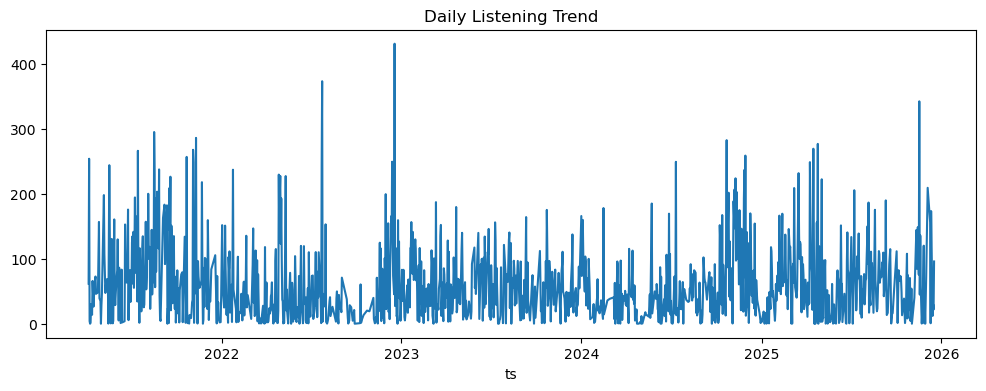

In [25]:
daily_trend = df.groupby(df['ts'].dt.date)['play_minutes'].sum()

daily_trend.plot(figsize=(12,4), title="Daily Listening Trend")
plt.show()


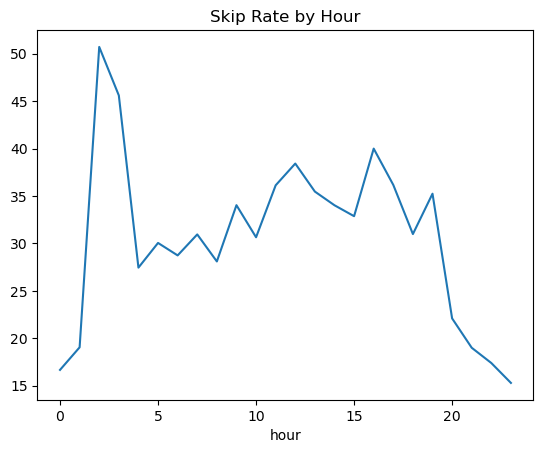

In [26]:
skip_by_hour = df.groupby('hour')['skip_flag'].mean() * 100

skip_by_hour.plot(title="Skip Rate by Hour")
plt.show()


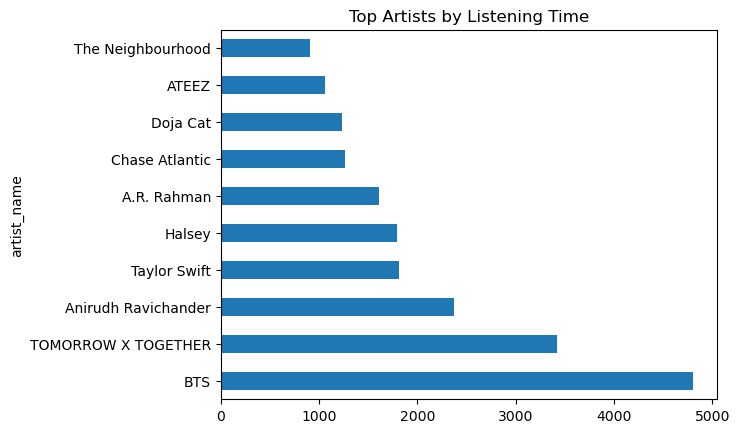

In [27]:
top_artists_time = (
    df.groupby('artist_name')['play_minutes']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_artists_time.plot(kind='barh', title="Top Artists by Listening Time")
plt.show()


In [28]:
session_length = df.groupby('session_id')['play_minutes'].sum()

session_length.describe()


count    2979.000000
mean       25.831898
std        31.891993
min         0.000350
25%         2.413308
50%        15.798600
75%        39.391217
max       612.816350
Name: play_minutes, dtype: float64

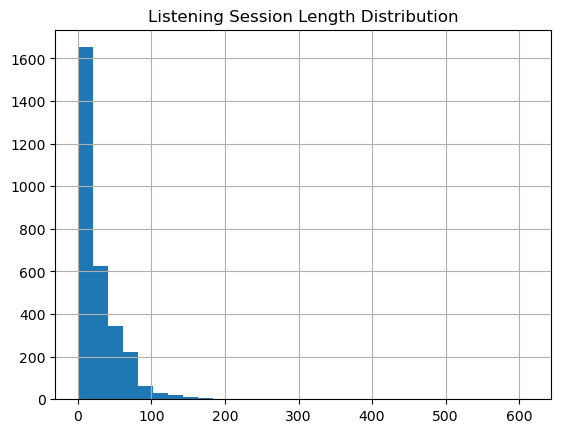

In [29]:
session_length.hist(bins=30)
plt.title("Listening Session Length Distribution")
plt.show()


In [30]:
df.groupby('shuffle').agg(
    avg_minutes=('play_minutes','mean'),
    skip_rate=('skip_flag','mean')
)


,avg_minutes,skip_rate
shuffle,,
False,2.360893,0.326206
True,2.366216,0.374680
